In [16]:
import tongxinda_data  as txd  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f= "/Users/quchaodong/stu/py_research/tmp/export/SZ#300739.txt"
dt = txd.read_txt_data(f)
print(dt.tail(1))

             open  close    low   high      vol          ms
date                                                       
2020-01-17  21.01  21.09  20.38  20.45  4695706  97210304.0


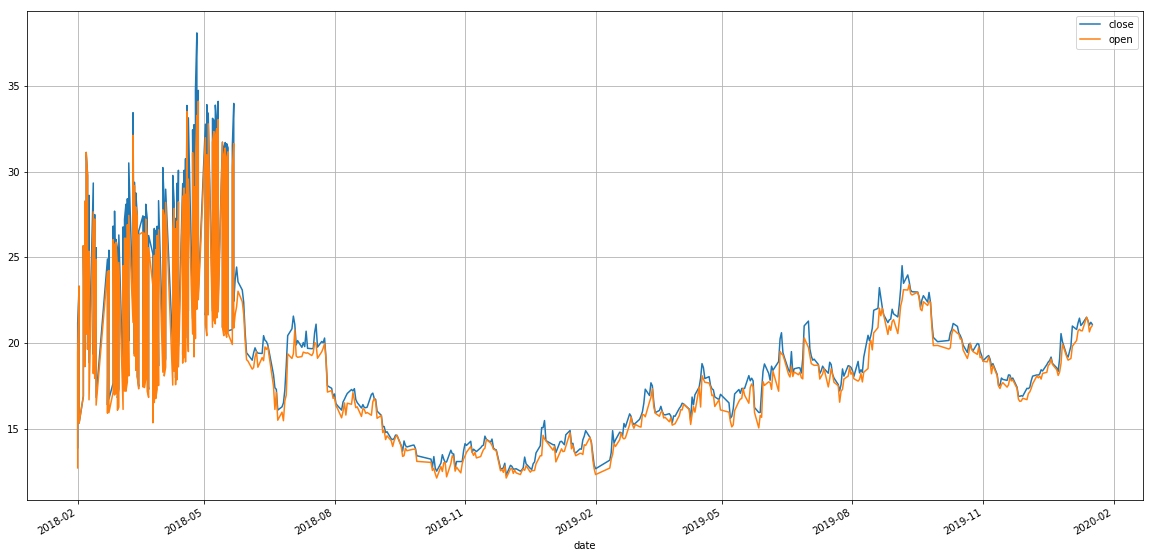

In [3]:
dt[['close','open']].plot(grid=True, figsize=(20, 10))

In [23]:
f= "/Users/quchaodong/stu/py_research/tmp/edata/SZ#000768.txt"
dt = txd.read_txt_data(f)
print(dt.tail(1))

            open  close    low   high       vol           ms
date                                                        
2020-01-23  16.8  17.46  16.55  16.64  34465269  587048192.0


In [26]:
#dt.loc['2020-01-10':'2020-01-23']
#dt.tail(10)

,open,close,low,high,vol,ms
date,,,,,,
2020-01-10,16.96,17.05,16.78,16.83,14467358,244164720.0
2020-01-13,16.78,16.93,16.60,16.91,15690835,262957408.0
2020-01-14,16.95,17.22,16.87,16.90,24227224,413319264.0
2020-01-15,16.88,16.94,16.50,16.57,19531645,325364960.0
2020-01-16,16.64,17.04,16.61,16.62,22763244,382366560.0
2020-01-17,16.62,16.77,16.54,16.64,14260479,237663456.0
2020-01-20,16.66,17.09,16.66,16.95,22103730,374176352.0
2020-01-21,16.90,17.08,16.82,16.88,17362440,294032512.0
2020-01-22,16.79,17.04,16.52,16.94,17484734,293608160.0


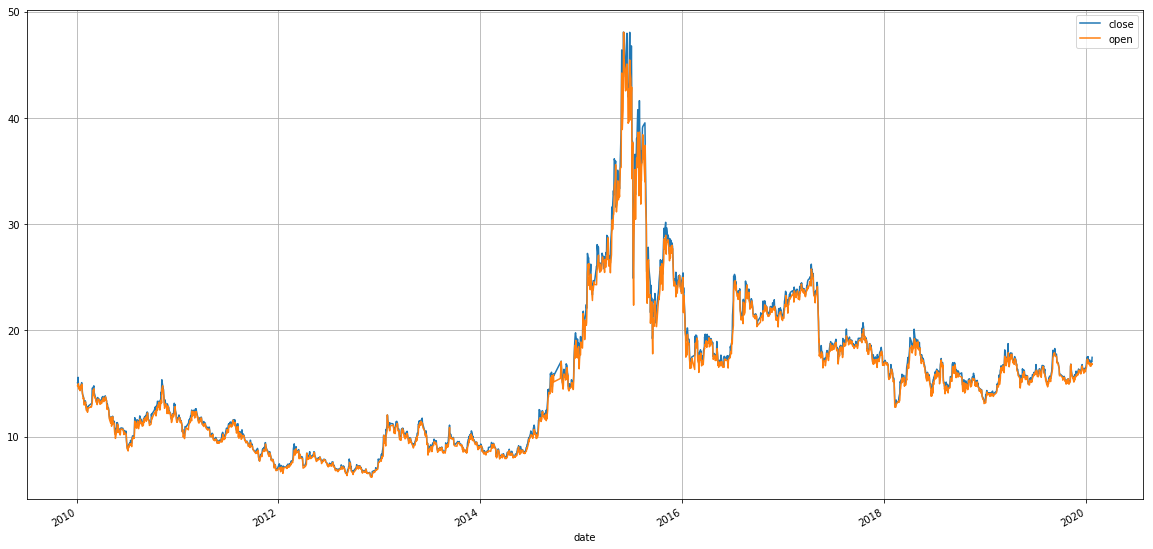

In [7]:
dt[['close','open']].plot(grid=True, figsize=(20, 10))

In [17]:
#dt[dt.index >'2019-01-04'].tail(10)

In [40]:

def test( dataFile , start_time ):    
    dt = txd.read_txt_data(dataFile)
    
    #选取一段时间
    dd = dt[dt.index > start_time ]
    #dd = dt.loc['2019-01-01':'2020-2-1']
    #dd[['close','open']].plot(grid=True, figsize=(20, 10))
    
    minx = dd['close'].rolling(10).min()
    rt = pd.DataFrame({   
    'close': dd['close'],
    'minx': minx})

    
    #dd[['close','sam']].plot(grid=True, figsize=(20, 10))
    rt.plot(grid=True , figsize=(20, 10))
    



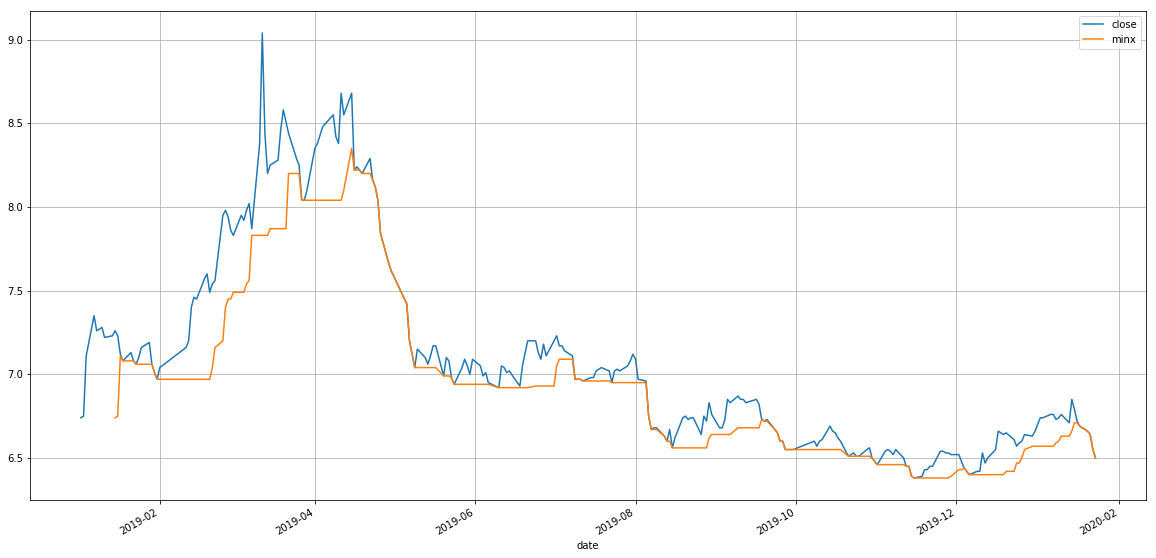

In [42]:
dataFile= "/Users/quchaodong/stu/py_research/tmp/edata/SH#600089.txt"
test( dataFile , '2019-01-01')

In [4]:
dfc = pd.DataFrame({'A': ['aaa', 'bbb', 'ccc'], 'B': [1, 2, 3]})
dfc.loc[0, 'A'] = 11


In [6]:
dt = txd.read_txt_data(dataFile)


In [8]:
dt['dir'] = 0;


In [14]:
dt.iloc[0,6] =1
dt.iloc[0,6]

1

In [19]:
for i in range(0 , 10 ):
    print(9 - i)

9
8
7
6
5
4
3
2
1
0
